In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import openpyxl
import pprint
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

##Read file

In [ ]:
print(os.listdir('/content/drive/MyDrive/code colab'))

['junction_postvip_sum_6mon_enr.txt', '.ipynb_checkpoints', 'Danh_sach_truong_bai_1.xlsx']


In [ ]:
filename = open('/content/drive/MyDrive/code colab/junction_postvip_sum_6mon_enr.txt')

In [ ]:
data = pd.read_csv(filename, sep='|', index_col=None, header=None)

In [ ]:
wb = openpyxl.load_workbook('/content/drive/MyDrive/code colab/Danh_sach_truong_bai_1.xlsx')

In [ ]:
sheet = wb['Sheet1']
sheet

<Worksheet "Sheet1">

In [ ]:
def get_label(sheet):
    return([[cell.value for cell in row] for row in sheet])

all_labels = get_label(sheet['A2:A154'])
pprint.pprint(all_labels)

[['ID'],
 ['sum_total_use_charge_tn'],
 ['sum_total_use_charge_tn_1'],
 ['sum_total_use_charge_tn_2'],
 ['sum_total_use_charge_tn_3'],
 ['sum_total_use_charge_tn_4'],
 ['sum_total_use_charge_tn_5'],
 ['sum_total_A s_tn'],
 ['sum_total_A s_tn_1'],
 ['sum_total_A s_tn_2'],
 ['sum_total_A s_tn_3'],
 ['sum_total_A s_tn_4'],
 ['sum_total_A s_tn_5'],
 ['sum_free_service_fee_tn'],
 ['sum_free_service_fee_tn_1'],
 ['sum_free_service_fee_tn_2'],
 ['sum_free_service_fee_tn_3'],
 ['sum_free_service_fee_tn_4'],
 ['sum_free_service_fee_tn_5'],
 ['sum_t_A_charge_tn'],
 ['sum_t_A_charge_tn_1'],
 ['sum_t_A_charge_tn_2'],
 ['sum_t_A_charge_tn_3'],
 ['sum_t_A_charge_tn_4'],
 ['sum_t_A_charge_tn_5'],
 ['sum_t_dịch vụ B_charge_tn'],
 ['sum_t_dịch vụ B_charge_tn_1'],
 ['sum_t_dịch vụ B_charge_tn_2'],
 ['sum_t_dịch vụ B_charge_tn_3'],
 ['sum_t_dịch vụ B_charge_tn_4'],
 ['sum_t_dịch vụ B_charge_tn_5'],
 ['sum_t_dịch vụ B_times_tn'],
 ['sum_t_dịch vụ B_times_tn_1'],
 ['sum_t_dịch vụ B_times_tn_2'],
 ['sum_t_d

In [ ]:
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919361 entries, 0 to 919360
Columns: 153 entries, 0 to 152
dtypes: float64(150), int64(3)
memory usage: 1.0 GB


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152
0,2285899345,349688.56,400264.96,366640.87,464489.95,387936.79,364476.79,559.0,682.0,601.0,943.0,629.0,553.0,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,75825.0,126765.00,101550.00,188490.00,108255.00,89295.00,12499.98,12136.38,5545.47,14636.37,20136.39,13818.21,41.0,41.0,19.0,49.0,68.0,47.0,254.0,385.0,378.0,...,12561.0,7217.0,5950.0,75825.0,126765.0,101550.0,188490.0,108255.0,89295.0,29.0,21.0,8.0,28.0,35.0,22.0,9227.22,6681.78,2545.44,8909.04,11136.30,6999.96,5.622590e+09,2.588251e+09,2.003078e+09,2.143937e+09,1.580307e+09,2.226476e+09,231.0,223.0,173.0,242.0,198.0,178.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2293856355,195987.11,224965.55,182741.57,206699.93,180660.21,183674.34,712.0,857.0,374.0,747.0,519.0,440.0,63636.3636,63636.3636,63636.3636,63636.3636,63636.3636,63636.3636,2805.0,4965.00,105.00,1245.00,660.00,765.00,31818.48,58636.92,21272.94,44091.30,23636.58,26545.71,116.0,214.0,78.0,160.0,86.0,97.0,207.0,308.0,125.0,...,81.0,44.0,51.0,2805.0,4965.0,105.0,1245.0,660.0,765.0,4.0,6.0,0.0,10.0,4.0,2.0,1272.72,1909.08,0.00,3181.80,1272.72,636.36,1.648180e+09,8.478351e+09,2.606203e+09,3.339886e+09,4.079155e+09,3.200024e+09,356.0,302.0,139.0,336.0,169.0,138.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2290588355,316340.62,322837.18,248428.44,240993.57,224259.06,207918.73,2021.0,1773.0,1205.0,1335.0,1327.0,1243.0,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,56295.0,57382.27,48701.02,67175.15,49576.94,44191.26,26863.80,39545.82,17454.69,32454.78,33318.48,22363.83,101.0,144.0,63.0,116.0,121.0,81.0,1421.0,1317.0,1104.0,...,4410.0,2791.0,2827.0,56295.0,55845.0,38520.0,66420.0,41985.0,42555.0,21.0,6.0,6.0,18.0,7.0,6.0,6681.78,1909.08,1909.08,5727.24,2227.26,1909.08,6.456024e+09,4.597626e+09,7.966665e+06,1.292456e+06,1.143210e+05,0.000000e+00,466.0,278.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2216952365,181012.38,175681.86,233540.52,155115.52,152377.36,156420.10,290.0,246.0,252.0,186.0,198.0,244.0,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,285.0,0.00,495.00,570.00,1650.00,420.00,13000.11,7954.59,13500.06,10454.61,9363.72,15545.55,47.0,28.0,47.0,37.0,34.0,63.0,84.0,74.0,77.0,...,38.0,110.0,28.0,285.0,0.0,495.0,570.0,1650.0,420.0,4.0,7.0,15.0,8.0,2.0,12.0,1272.72,2227.26,4772.70,2545.44,636.36,3818.16,1.063985e+09,2.013412e+09,1.147842e+09,6.708539e+07,1.441867e+08,9.064167e+08,126.0,111.0,94.0,25.0,33.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2221641375,334968.69,434120.10,253201.41,199496.40,126333.27,102412.77,1671.0,1717.0,1255.0,695.0,668.0,386.0,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,232605.0,333165.48,154065.00,103860.00,25515.00,7140.00,11454.60,10045.53,8227.32,4727.31,9909.18,4363.68,40.0,36.0,29.0,17.0,36.0,16.0,1259.0,1240.0,818.0,...,6924.0,1698.0,476.0,232605.0,164430.0,154065.0,103860.0,25515.0,7140.0,12.0,5.0,7.0,2.0,2.0,0.0,3818.16,1590.90,2227.26,636.36,636.36,0.00,1.897590e+09,3.428991e+09,2.340105e+09,1.506797e+09,9.960350e+08,9.723763e+08,340.0,409.0,377.0,169.0,275.0,188.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919356,879581167,1062387.50,301511.08,284504.65,348671.82,334709.20,316715.98,891.0,879.0,871.0,797.0,823.0,924.0,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,74625.0,93420.00,88050.00,115110.00,126300.00,95625.00,17818.28,25818.36,18727.38,13636.41,29772.84,25181.89,56.0,92.0,66.0,53.0,103.0,73.0,222.0,179.0,205.0,...,7672.0,8

In [ ]:
all_labels = np.array(all_labels)
all_labels.shape
all_labels = all_labels.flatten()

In [ ]:
all_labels.shape

(153,)

In [ ]:
data.columns = all_labels
data.head(6)

,ID,sum_total_use_charge_tn,sum_total_use_charge_tn_1,sum_total_use_charge_tn_2,sum_total_use_charge_tn_3,sum_total_use_charge_tn_4,sum_total_use_charge_tn_5,sum_total_A s_tn,sum_total_A s_tn_1,sum_total_A s_tn_2,sum_total_A s_tn_3,sum_total_A s_tn_4,sum_total_A s_tn_5,sum_free_service_fee_tn,sum_free_service_fee_tn_1,sum_free_service_fee_tn_2,sum_free_service_fee_tn_3,sum_free_service_fee_tn_4,sum_free_service_fee_tn_5,sum_t_A_charge_tn,sum_t_A_charge_tn_1,sum_t_A_charge_tn_2,sum_t_A_charge_tn_3,sum_t_A_charge_tn_4,sum_t_A_charge_tn_5,sum_t_dịch vụ B_charge_tn,sum_t_dịch vụ B_charge_tn_1,sum_t_dịch vụ B_charge_tn_2,sum_t_dịch vụ B_charge_tn_3,sum_t_dịch vụ B_charge_tn_4,sum_t_dịch vụ B_charge_tn_5,sum_t_dịch vụ B_times_tn,sum_t_dịch vụ B_times_tn_1,sum_t_dịch vụ B_times_tn_2,sum_t_dịch vụ B_times_tn_3,sum_t_dịch vụ B_times_tn_4,sum_t_dịch vụ B_times_tn_5,sum_t_A _times_tn,sum_t_A _times_tn_1,sum_t_A _times_tn_2,...,sum_G _duration_tn_3,sum_G _duration_tn_4,sum_G _duration_tn_5,sum_G _charge_tn,sum_G _charge_tn_1,sum_G _charge_tn_2,sum_G _charge_tn_3,sum_G _charge_tn_4,sum_G _charge_tn_5,sum_H_times_tn,sum_H_times_tn_1,sum_H_times_tn_2,sum_H_times_tn_3,sum_H_times_tn_4,sum_H_times_tn_5,sum_H_charge_tn,sum_H_charge_tn_1,sum_H_charge_tn_2,sum_H_charge_tn_3,sum_H_charge_tn_4,sum_H_charge_tn_5,sum_M_volume_tn,sum_M_volume_tn_1,sum_M_volume_tn_2,sum_M_volume_tn_3,sum_M_volume_tn_4,sum_M_volume_tn_5,sum_M_times_tn,sum_M_times_tn_1,sum_M_times_tn_2,sum_M_times_tn_3,sum_M_times_tn_4,sum_M_times_tn_5,sum_M_charge_tn,sum_M_charge_tn_1,sum_M_charge_tn_2,sum_M_charge_tn_3,sum_M_charge_tn_4,sum_M_charge_tn_5,churn
0,2285899345,349688.56,400264.96,366640.87,464489.95,387936.79,364476.79,559.0,682.0,601.0,943.0,629.0,553.0,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,75825.0,126765.00,101550.00,188490.00,108255.00,89295.00,12499.98,12136.38,5545.47,14636.37,20136.39,13818.21,41.0,41.0,19.0,49.0,68.0,47.0,254.0,385.0,378.0,...,12561.0,7217.0,5950.0,75825.0,126765.0,101550.0,188490.0,108255.0,89295.0,29.0,21.0,8.0,28.0,35.0,22.0,9227.22,6681.78,2545.44,8909.04,11136.30,6999.96,5.622590e+09,2.588251e+09,2.003078e+09,2.143937e+09,1.580307e+09,2.226476e+09,231.0,223.0,173.0,242.0,198.0,178.0,0.0,0.0,0.0,0.0,0.0,0.00,0
1,2293856355,195987.11,224965.55,182741.57,206699.93,180660.21,183674.34,712.0,857.0,374.0,747.0,519.0,440.0,63636.3636,63636.3636,63636.3636,63636.3636,63636.3636,63636.3636,2805.0,4965.00,105.00,1245.00,660.00,765.00,31818.48,58636.92,21272.94,44091.30,23636.58,26545.71,116.0,214.0,78.0,160.0,86.0,97.0,207.0,308.0,125.0,...,81.0,44.0,51.0,2805.0,4965.0,105.0,1245.0,660.0,765.0,4.0,6.0,0.0,10.0,4.0,2.0,1272.72,1909.08,0.00,3181.80,1272.72,636.36,1.648180e+09,8.478351e+09,2.606203e+09,3.339886e+09,4.079155e+09,3.200024e+09,356.0,302.0,139.0,336.0,169.0,138.0,0.0,0.0,0.0,0.0,0.0,0.00,0
2,2290588355,316340.62,322837.18,248428.44,240993.57,224259.06,207918.73,2021.0,1773.0,1205.0,1335.0,1327.0,1243.0,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,136363.6363,56295.0,57382.27,48701.02,67175.15,49576.94,44191.26,26863.80,39545.82,17454.69,32454.78,33318.48,22363.83,101.0,144.0,63.0,116.0,121.0,81.0,1421.0,1317.0,1104.0,...,4410.0,2791.0,2827.0,56295.0,55845.0,38520.0,66420.0,41985.0,42555.0,21.0,6.0,6.0,18.0,7.0,6.0,6681.78,1909.08,1909.08,5727.24,2227.26,1909.08,6.456024e+09,4.597626e+09,7.966665e+06,1.292456e+06,1.143210e+05,0.000000e+00,466.0,278.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0
3,2216952365,181012.38,175681.86,233540.52,155115.52,152377.36,156420.10,290.0,246.0,252.0,186.0,198.0,244.0,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,90909.0909,285.0,0.00,495.00,570.00,1650.00,420.00,13000.11,7954.59,13500.06,10454.61,9363.72,15545.55,47.0,28.0,47.0,37.0,34.0,63.0,84.0,74.0,77.0,...,38.0,110.0,28.0,285.0,0.0,495.0,570.0,1650.0,420.0,4.0,7.0,15.0,8.0,2.0,12.0,1272.72,2227.26,4772.70,2545.44,636.36,3818.16,1.063985e+09,2.013412e+09,1.147842e+09,6.708539e+07,1.441867e+08,9.064167e

In [ ]:
data.describe()

,ID,sum_total_use_charge_tn,sum_total_use_charge_tn_1,sum_total_use_charge_tn_2,sum_total_use_charge_tn_3,sum_total_use_charge_tn_4,sum_total_use_charge_tn_5,sum_total_A s_tn,sum_total_A s_tn_1,sum_total_A s_tn_2,sum_total_A s_tn_3,sum_total_A s_tn_4,sum_total_A s_tn_5,sum_free_service_fee_tn,sum_free_service_fee_tn_1,sum_free_service_fee_tn_2,sum_free_service_fee_tn_3,sum_free_service_fee_tn_4,sum_free_service_fee_tn_5,sum_t_A_charge_tn,sum_t_A_charge_tn_1,sum_t_A_charge_tn_2,sum_t_A_charge_tn_3,sum_t_A_charge_tn_4,sum_t_A_charge_tn_5,sum_t_dịch vụ B_charge_tn,sum_t_dịch vụ B_charge_tn_1,sum_t_dịch vụ B_charge_tn_2,sum_t_dịch vụ B_charge_tn_3,sum_t_dịch vụ B_charge_tn_4,sum_t_dịch vụ B_charge_tn_5,sum_t_dịch vụ B_times_tn,sum_t_dịch vụ B_times_tn_1,sum_t_dịch vụ B_times_tn_2,sum_t_dịch vụ B_times_tn_3,sum_t_dịch vụ B_times_tn_4,sum_t_dịch vụ B_times_tn_5,sum_t_A _times_tn,sum_t_A _times_tn_1,sum_t_A _times_tn_2,...,sum_G _duration_tn_3,sum_G _duration_tn_4,sum_G _duration_tn_5,sum_G _charge_tn,sum_G _charge_tn_1,sum_G _charge_tn_2,sum_G _charge_tn_3,sum_G _charge_tn_4,sum_G _charge_tn_5,sum_H_times_tn,sum_H_times_tn_1,sum_H_times_tn_2,sum_H_times_tn_3,sum_H_times_tn_4,sum_H_times_tn_5,sum_H_charge_tn,sum_H_charge_tn_1,sum_H_charge_tn_2,sum_H_charge_tn_3,sum_H_charge_tn_4,sum_H_charge_tn_5,sum_M_volume_tn,sum_M_volume_tn_1,sum_M_volume_tn_2,sum_M_volume_tn_3,sum_M_volume_tn_4,sum_M_volume_tn_5,sum_M_times_tn,sum_M_times_tn_1,sum_M_times_tn_2,sum_M_times_tn_3,sum_M_times_tn_4,sum_M_times_tn_5,sum_M_charge_tn,sum_M_charge_tn_1,sum_M_charge_tn_2,sum_M_charge_tn_3,sum_M_charge_tn_4,sum_M_charge_tn_5,churn
count,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,919361.000000,919361.000000,919361.000000,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,...,919361.000000,919361.000000,919361.000000,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,919361.000000,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,919361.000000,919361.000000,919361.000000,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,9.193610e+05,919361.000000
mean,1.570801e+09,2.084550e+05,2.116848e+05,2.106786e+05,2.169524e+05,2.122774e+05,2.151770e+05,618.990584,626.694941,622.522938,6.514633e+02,6.243340e+02,6.367135e+02,8.703543e+04,8.814898e+04,8.839033e+04,8.842119e+04,8.839554e+04,8.660973e+04,5.902075e+04,5.971742e+04,5.946986e+04,6.434511e+04,6.061847e+04,6.250799e+04,1.648005e+04,1.722180e+04,1.732411e+04,1.768870e+04,1.663158e+04,1.684698e+04,60.498067,63.432966,63.876470,65.169268,60.905014,61.759147,316.436448,319.600349,322.479529,...,3366.201597,3187.379650,3216.726231,4.325933e+04,4.414272e+04,4.413850e+04,4.717459e+04,4.458929e+04,4.514138e+04,15.193299,15.982011,16.177130,16.272252,15.012387,15.193745,4.643228e+03,4.836030e+03,4.887521e+03,4.937459e+03,4.599621e+03,4.678444e+03,2.185891e+09,2.179904e+09,1.997559e+09,1.516975e+09,1.451353e+09,1.427577e+09,208.019405,209.405338,203.027446,2.100034e+02,2.005166e+02,2.068003e+02,1.160021e+03,1.217040e+03,1.331257e+03,1.350054e+03,1.366997e+03,1.432062e+03,0.025536
std,2.171216e+09,2.106080e+05,2.133047e+05,2.230109e+05,2.185888e+05,2.355795e+05,2.177488e+05,2150.132833,2259.125389,2231.992389,2.448619e+03,2.478708e+03,2.689361e+03,6.398582e+04,6.455670e+04,6.486937e+04,6.470401e+04,6.448116e+04,6.314379e+04,1.473730e+05,1.473555e+05,1.536136e+05,1.586172e+05,1.758777

In [ ]:
# from pandas import DataFrame
# Info_cus = DataFrame(data, columns = ['ID', 'custmer_age'])

##Fix file

In [ ]:
data = data.drop(['ID','customer_age'],axis=1)

In [ ]:
cus_out = data.loc[data['churn'] == 1]
cus_use = data.loc[data['churn'] == 0]

##Visualize service

In [ ]:
def v_plot(lis_mean_use, lis_out):
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
  axes[0].bar([1,2,3,4,5,6],lis_mean_use)
  axes[0].set_title('mean of user')
  axes[1].bar([1,2,3,4,5,6],lis_out)
  axes[1].set_title('number of user out')
  plt.legend()
  plt.show()

In [ ]:
def counter_cus_mean_out(data, name_cols):
  lis_out = []
  lis_mean_use = []
  for col in name_cols:
    lis_mean_use.append(np.mean([v_use for v_use in data[col].values if v_use != 0]))
    lis_out.append((data[col]==0).sum(axis=0))
  v_plot(lis_mean_use, lis_out)
  # return lis_mean_use, lis_out

- Với các dịch vụ, chúng tôi sẽ đi phân ra hai loại thông tin:

1.   Thông tin về các khách hàng sử dụng dịch vụ đó trong tháng (Được tính theo giá trị trung bình của cả dữ liệu khách hàng sử dụng).
2.   Thông tin về các khách hàng không sử dụng dịch vụ trong tháng.


###Service A

- Với dịch vụ A ta có thể thấy biểu đồ 'mean of user' là các khách hàng sử dụng số lần dịch vụ có mức tăng giảm đồng đều 3 tháng đầu và 3 tháng sau có mức giảm nhẹ.
- Tháng thứ 4 đến tháng thứ 6 có mức giảm nhẹ về số lần sử dụng dịch vụ ở 'mean of user' nhưng ở 'number os user out' thì lại tăng nhanh chóng. Điều này có thể là dịch vụ miễn phí đang không được cải thiện so với dịch vụ mất phí làm các khách hàng sử dụng miễn phí rời đi. Hoặc trải nghiệm dịch vụ của khách hàng giảm đi.
- Tháng thứ 3 đạt đỉnh cao nhất với số lần sử dụng dịch vụ lớn của khách và số khách không sử dụng dịch vụ ở biểu đồ 'number of user out' tháng thứ 3 thấp nhất. Có thể thấy dịch vụ đã được khách hàng đón nhận mạnh sau 3 tháng đi vào hoạt động hoặc dịch vụ đã đưa ra chiến lược thu hút khách với khuyến mãi đặc biệt... 
- Nhưng sang tháng thứ 4 và các tháng còn lại thì mức sử dụng đang trên đà giảm nhẹ ở 'mean of user' và ở 'number of user out' thì cho thấy khách đang rời bỏ dịch vụ tăng mạnh (mất khách hàng). Có thể họ đã chuyển sang sử dụng dịch vụ khác hoặc họ từ bỏ dịch vụ của công ty. Điều này cho thấy cần cải thiện lại dịch vụ đưa ra thêm chính sách giữ chân khách hàng nhanh, tránh trường hợp các tháng tiếp theo khách hàng sẽ từ bỏ dịch vụ lên cao.

No handles with labels found to put in legend.


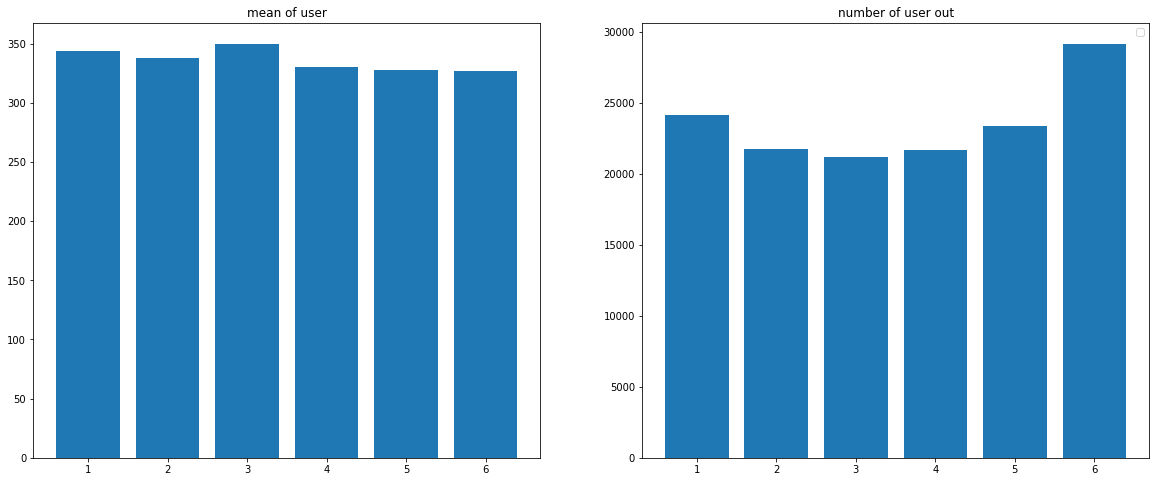

In [ ]:
#Tổng số lần sử dụng dịch vụ A (bao gồm cả có phí vs miễn phí)
Time_A = data.iloc[:,36:42]
Rev_TimeA = sorted(Time_A, reverse=True)
counter_cus_mean_out(data, Rev_TimeA)

No handles with labels found to put in legend.


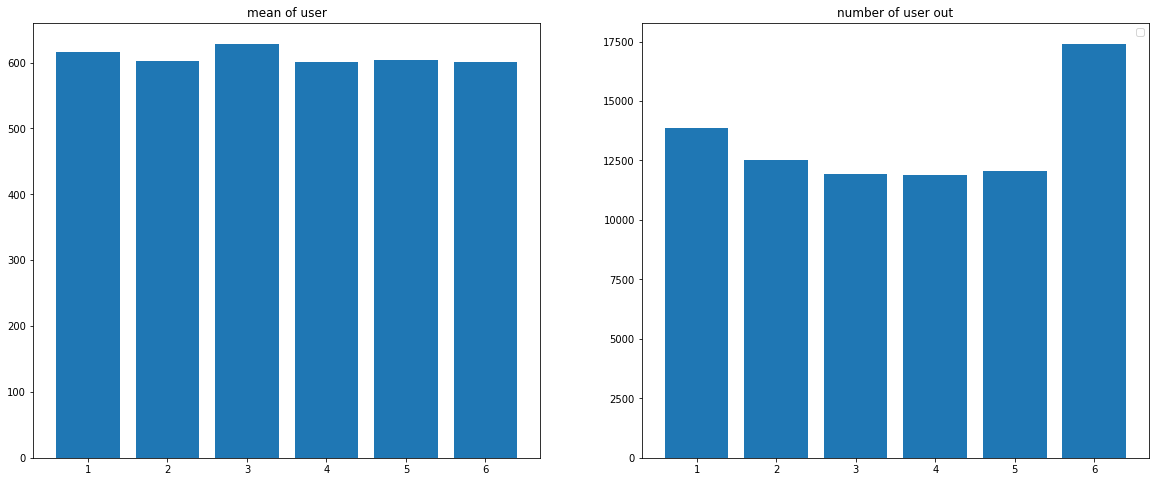

In [ ]:
#Tổng số lần sử dụng dịch vụ A (có phí)
name_column_total_useA = ['sum_total_use_A s_tn_5','sum_total_use_A s_tn_4','sum_total_use_A s_tn_3','sum_total_use_A s_tn_2','sum_total_use_A s_tn_1','sum_total_use_A s_tn']
counter_cus_mean_out(data, name_column_total_useA)

In [ ]:
# #Tổng số lần sử dụng dịch vụ A (có phí)
# Totaluse_A = data.iloc[:,42:48]
# Rev_TotaluseA = sorted(Totaluse_A, reverse=True)

No handles with labels found to put in legend.


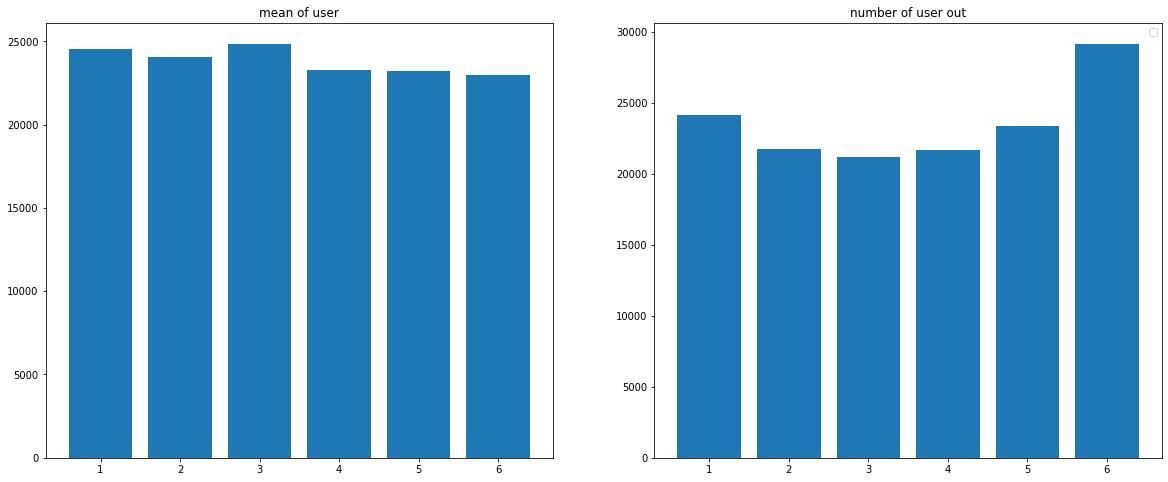

In [ ]:
#Tổng thời lượng sử dụng sử dụng dịch vụ A
Dur_A = data.iloc[:,48:54]
Rev_DurA = sorted(Dur_A, reverse=True)
counter_cus_mean_out(data, Rev_DurA)

No handles with labels found to put in legend.


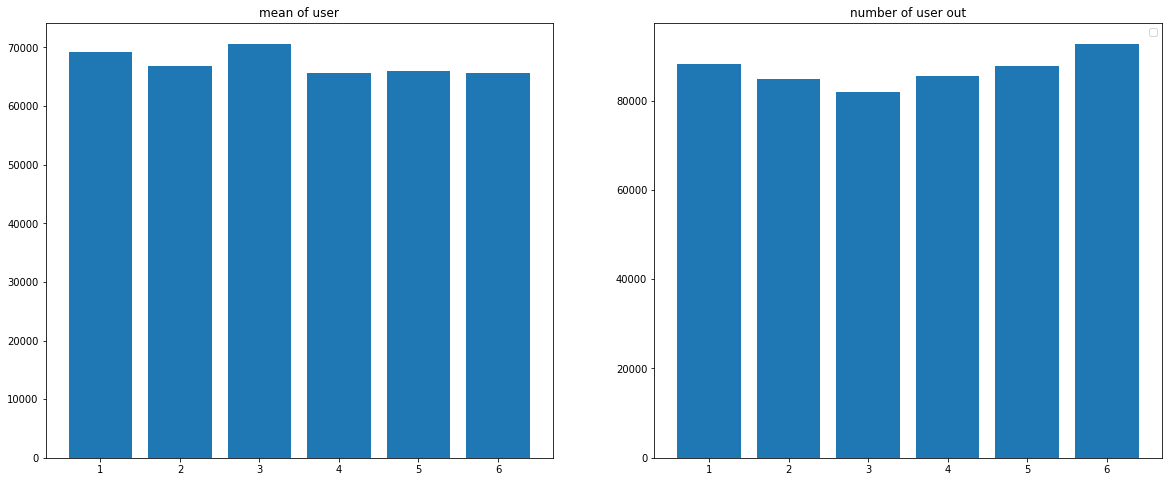

In [ ]:
Cha_A = data.iloc[:,18:24]
Rev_ChaA = sorted(Cha_A, reverse=True)
counter_cus_mean_out(data, Rev_ChaA)

###Service B

No handles with labels found to put in legend.


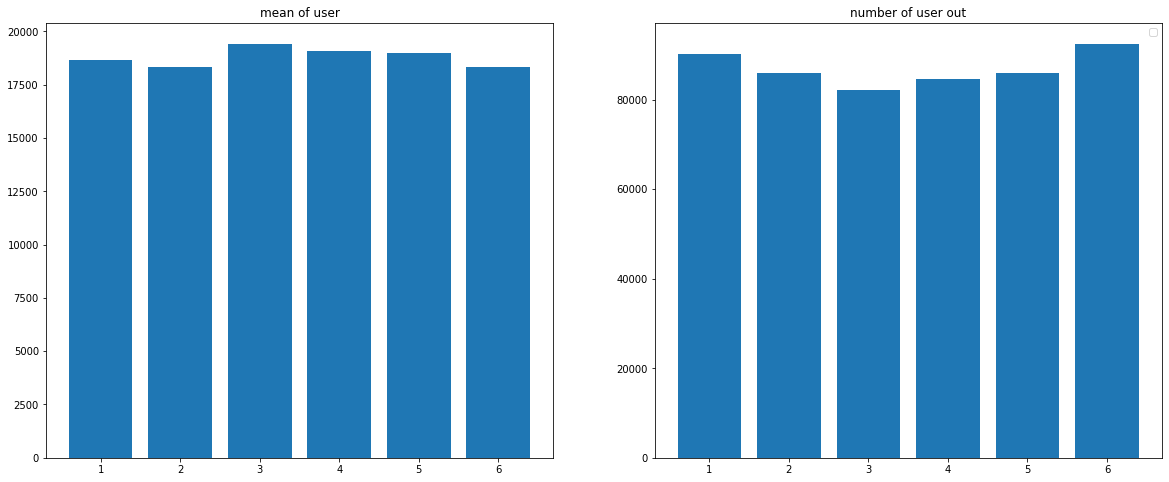

In [ ]:
#Tổng phí dịch vụ B
Cha_B = data.iloc[:,24:30]
Rev_ChaB = sorted(Cha_B, reverse=True)
counter_cus_mean_out(data, Rev_ChaB)

No handles with labels found to put in legend.


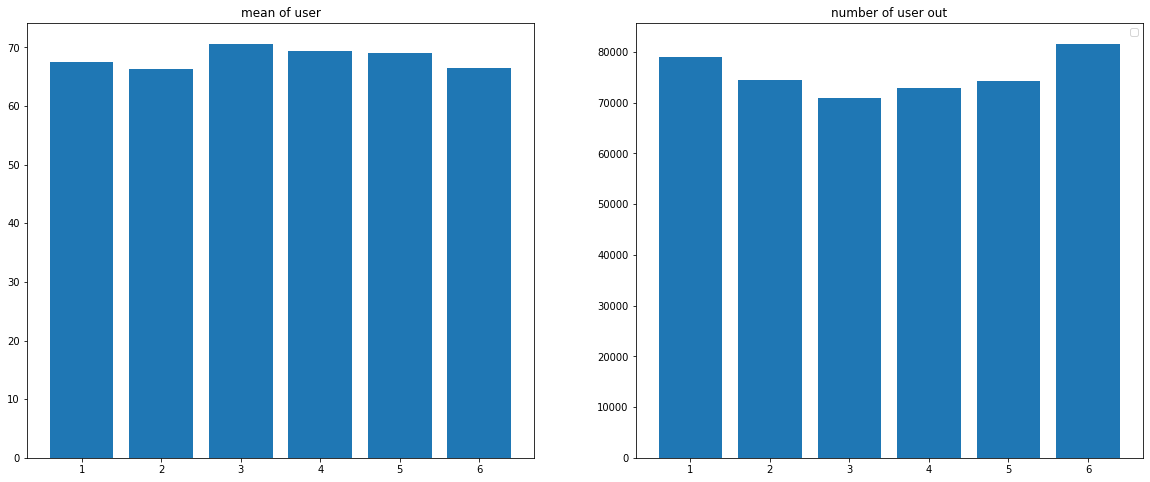

In [ ]:
#Tổng số dịch vụ B
Time_B = data.iloc[:,30:36]
Rev_TimeB = sorted(Time_B, reverse=True)
counter_cus_mean_out(data, Rev_TimeB)

###Service C

No handles with labels found to put in legend.


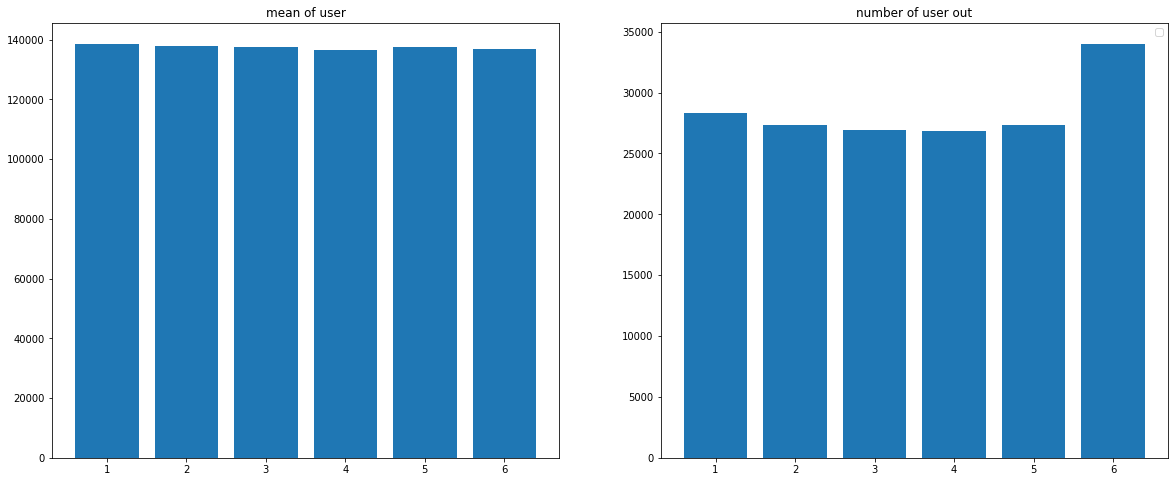

In [ ]:
#Tổng phí dịch vụ C
Cha_C = data.iloc[:,60:66]
Rev_ChaC = sorted(Cha_C, reverse=True)
counter_cus_mean_out(data, Rev_ChaC)

No handles with labels found to put in legend.


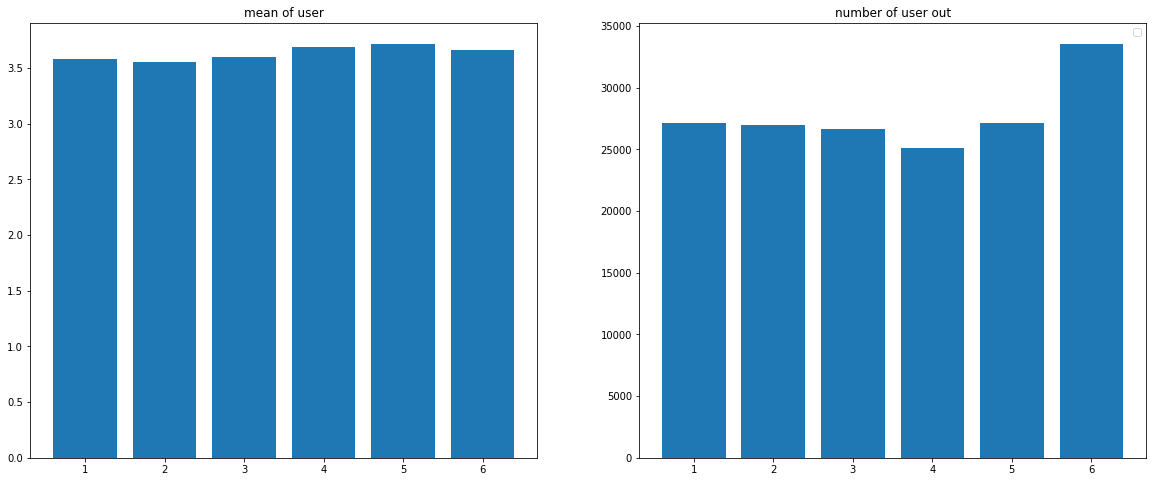

In [ ]:
#Tổng số dịch vụ C
#Có outliner
Time_C = data.iloc[:,66:72]
Rev_TimeC = sorted(Time_C, reverse=True)
counter_cus_mean_out(data, Rev_TimeC)

###Service D

No handles with labels found to put in legend.


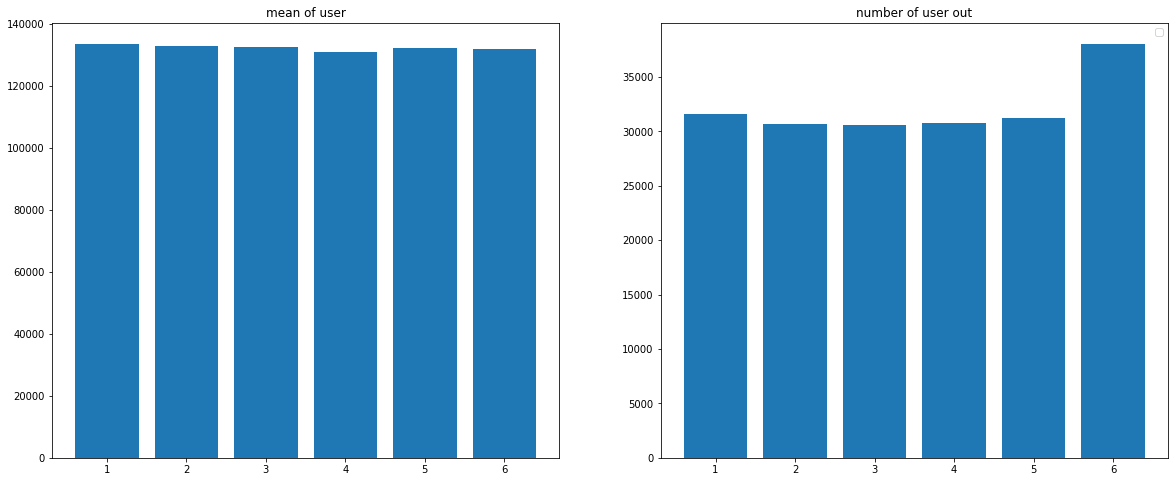

In [ ]:
#Tổng phí dịch vụ D
Cha_D = data.iloc[:,54:60]
Rev_ChaD = sorted(Cha_D, reverse=True)
counter_cus_mean_out(data, Rev_ChaD)

###Service E

No handles with labels found to put in legend.


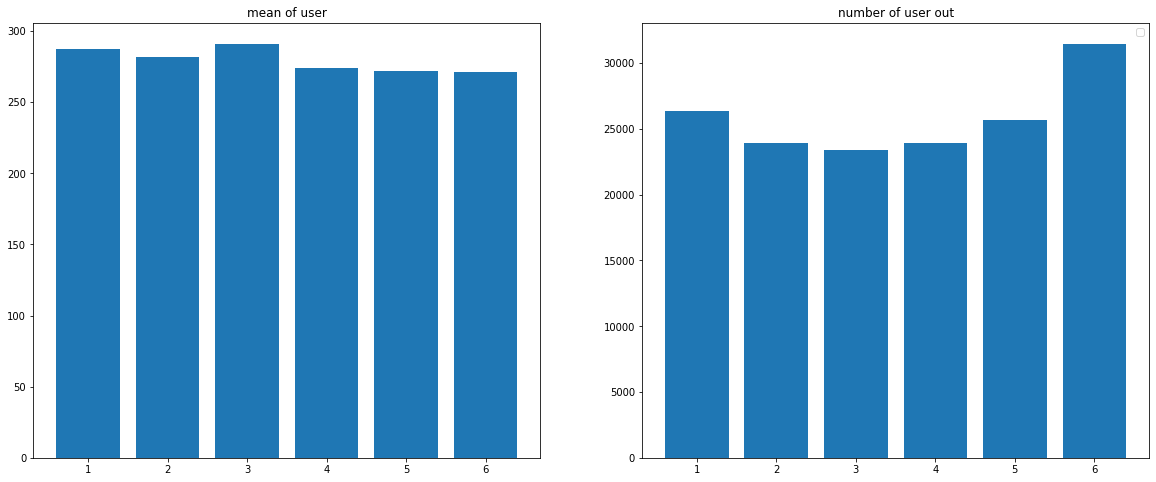

In [ ]:
#Tổng số lần sử dụng dịch vụ E
Time_E = data.iloc[:,72:78]
# Time_E = Time_E.mean().values
Rev_TimeE = sorted(Time_E, reverse=True)
counter_cus_mean_out(data, Rev_TimeE)

No handles with labels found to put in legend.


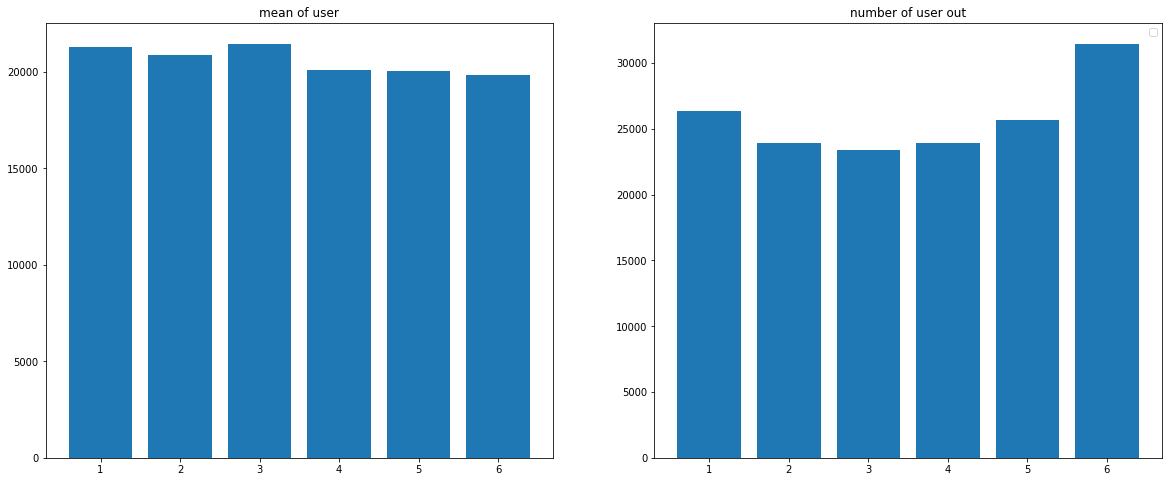

In [ ]:
#Tổng thời gian sử dụng dịch vụ E
Dur_E = data.iloc[:,78:84]
# Dur_E = Dur_E.mean().values
Rev_DurE = sorted(Dur_E, reverse=True)
counter_cus_mean_out(data, Rev_DurE)

No handles with labels found to put in legend.


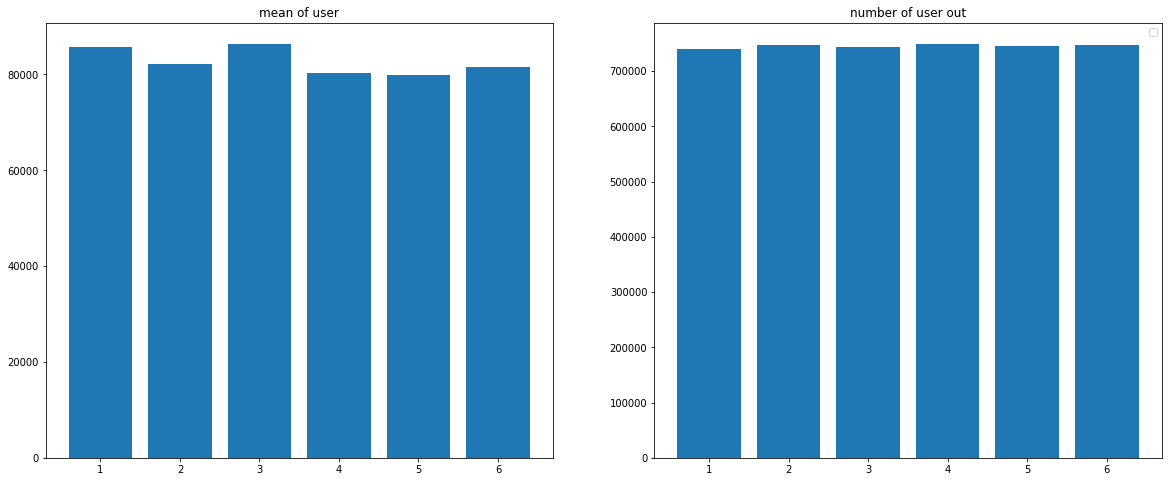

In [ ]:
#Tổng phí dịch vụ E
Cha_E = data.iloc[:,96:102]
Rev_ChaE = sorted(Cha_E, reverse=True)
counter_cus_mean_out(data, Rev_ChaE)

###Service F

No handles with labels found to put in legend.


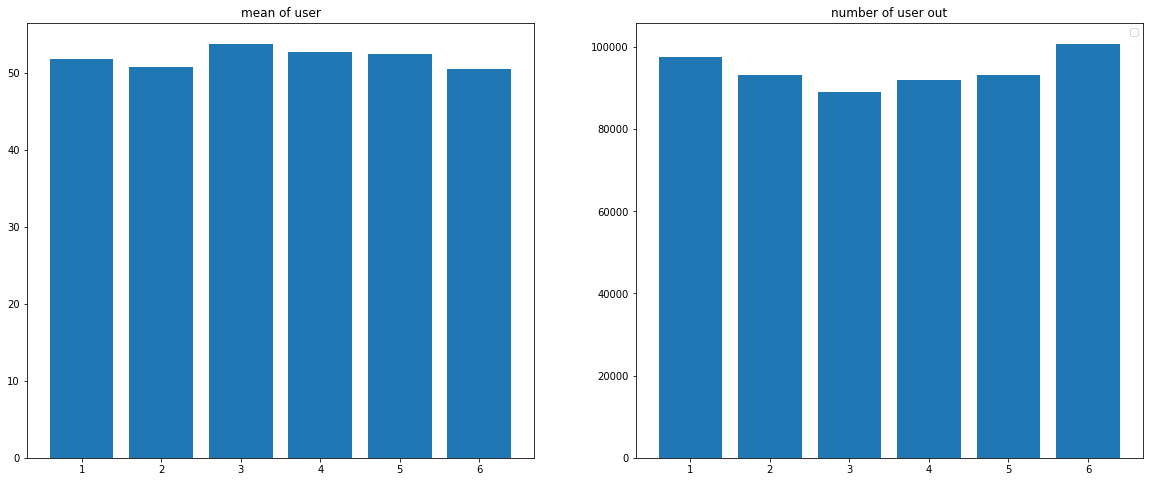

In [ ]:
#Tổng số lần sử dụng dịch vụ F
Time_F = data.iloc[:,84:90]
Rev_TimeF = sorted(Time_F, reverse=True)
counter_cus_mean_out(data, Rev_TimeF)

No handles with labels found to put in legend.


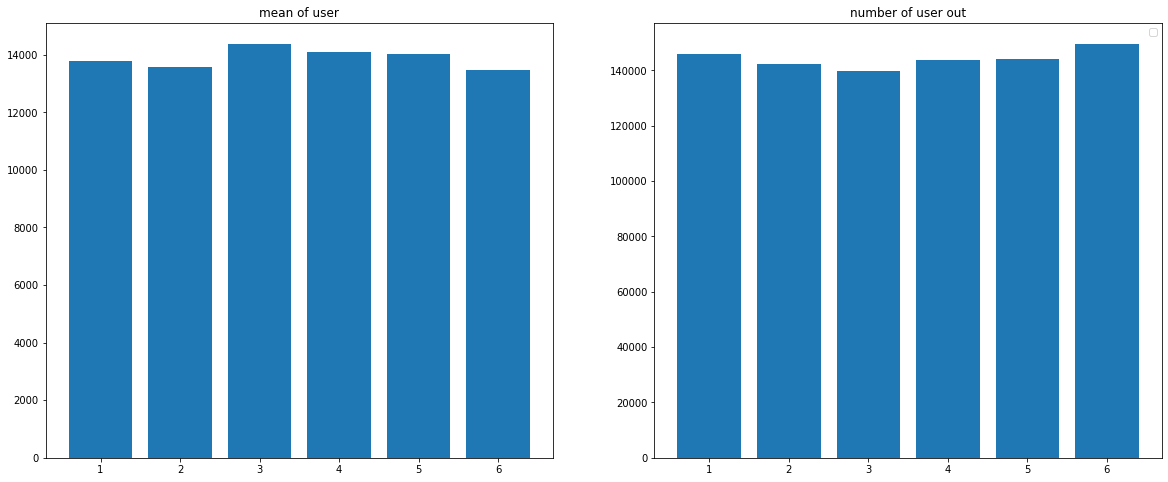

In [ ]:
#Tổng phí dịch vụ F
Cha_F = data.iloc[:,90:96]
Rev_ChaF = sorted(Cha_F, reverse=True)
counter_cus_mean_out(data, Rev_ChaF)

###Service G

No handles with labels found to put in legend.


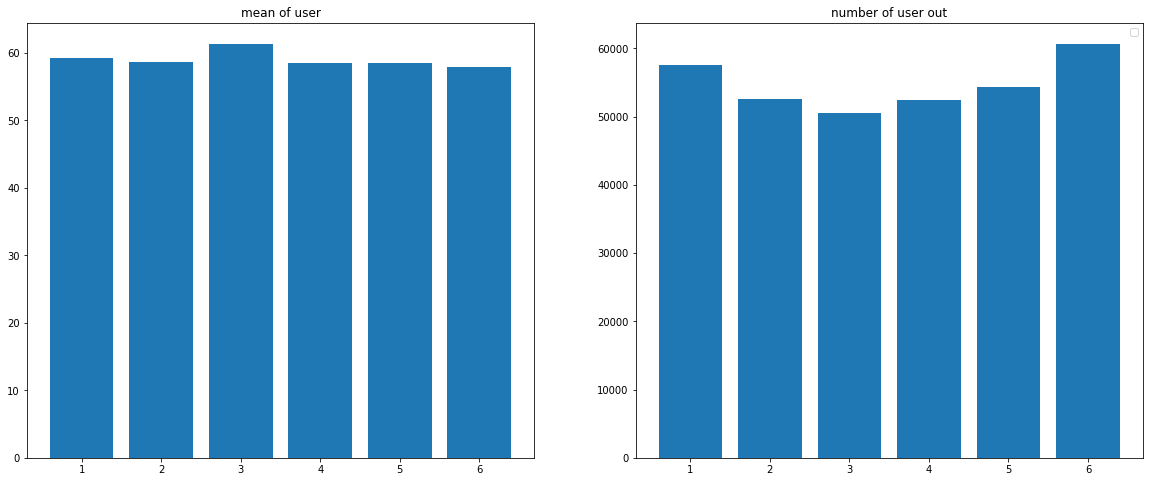

In [ ]:
#Tổng số lần sử dụng dịch vụ G
Time_G = data.iloc[:,102:108]
Rev_TimeG = sorted(Time_G, reverse=True)
counter_cus_mean_out(data, Rev_TimeG)

No handles with labels found to put in legend.


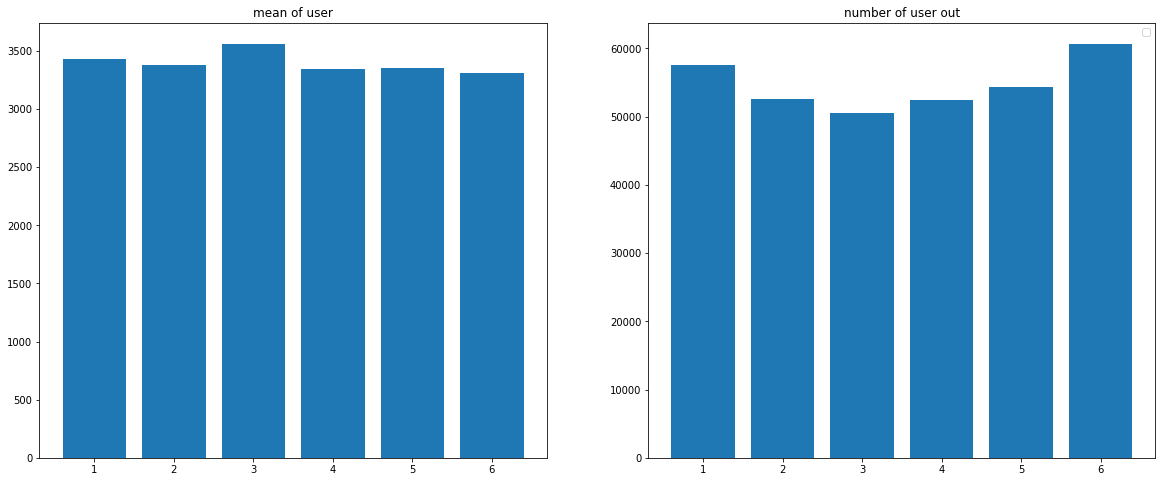

In [ ]:
#Tổng thời gian sử dụng dịch vụ G
Dur_G = data.iloc[:,108:114]
Rev_DurG = sorted(Dur_G, reverse=True)
counter_cus_mean_out(data, Rev_DurG)

No handles with labels found to put in legend.


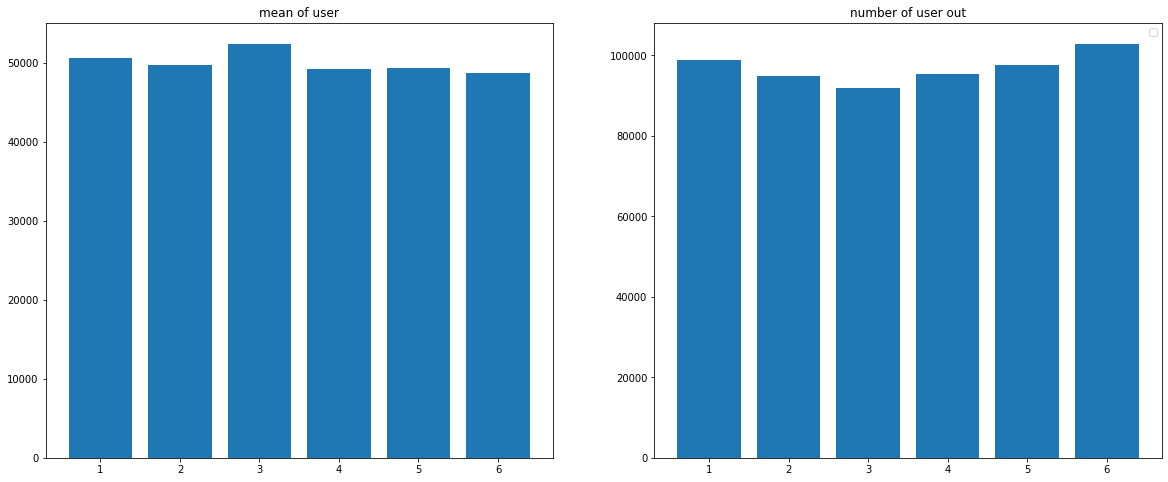

In [ ]:
#Tổng phí dịch vụ G
Cha_G = data.iloc[:,114:120]
Rev_ChaG = sorted(Cha_G, reverse=True)
counter_cus_mean_out(data, Rev_ChaG)

###Service H

No handles with labels found to put in legend.


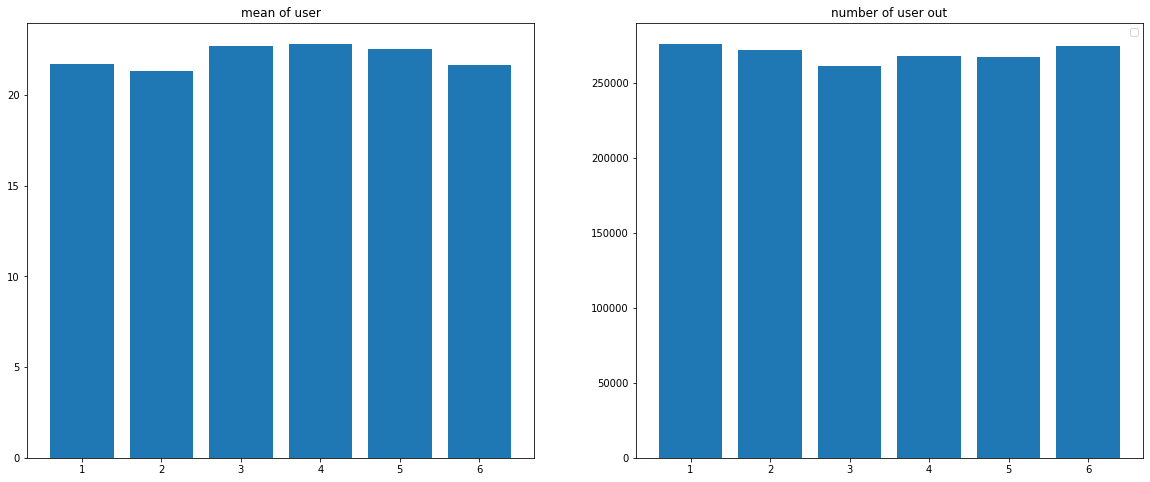

In [ ]:
#Tổng số lần sử dụng dịch vụ H
Time_H = data.iloc[:,120:126]
Rev_TimeH = sorted(Time_H, reverse=True)
counter_cus_mean_out(data, Rev_TimeH)

No handles with labels found to put in legend.


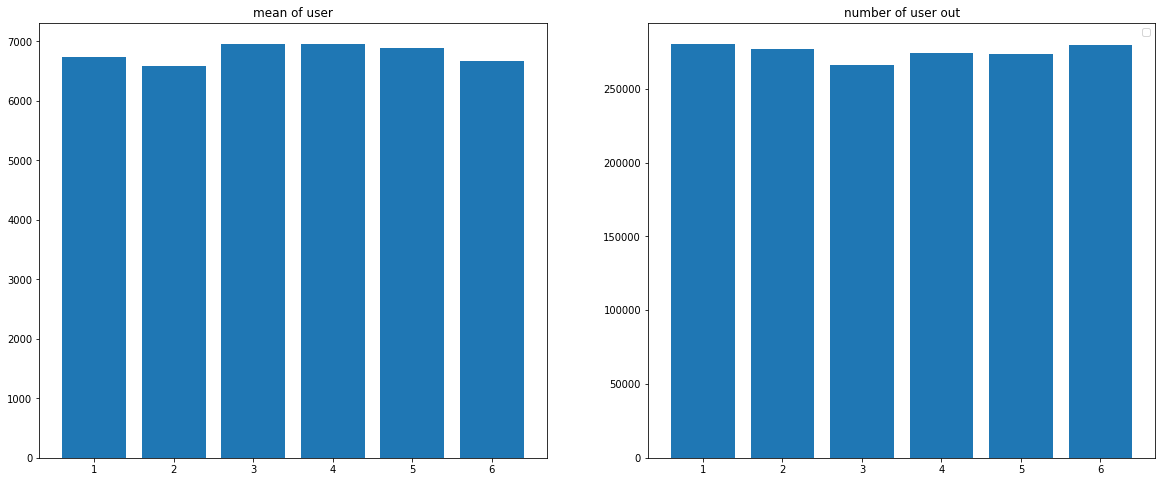

In [ ]:
#Tổng phí dịch vụ H
Cha_H = data.iloc[:,126:132]
Rev_ChaH = sorted(Cha_H, reverse=True)
counter_cus_mean_out(data, Rev_ChaH)

###Service M

No handles with labels found to put in legend.


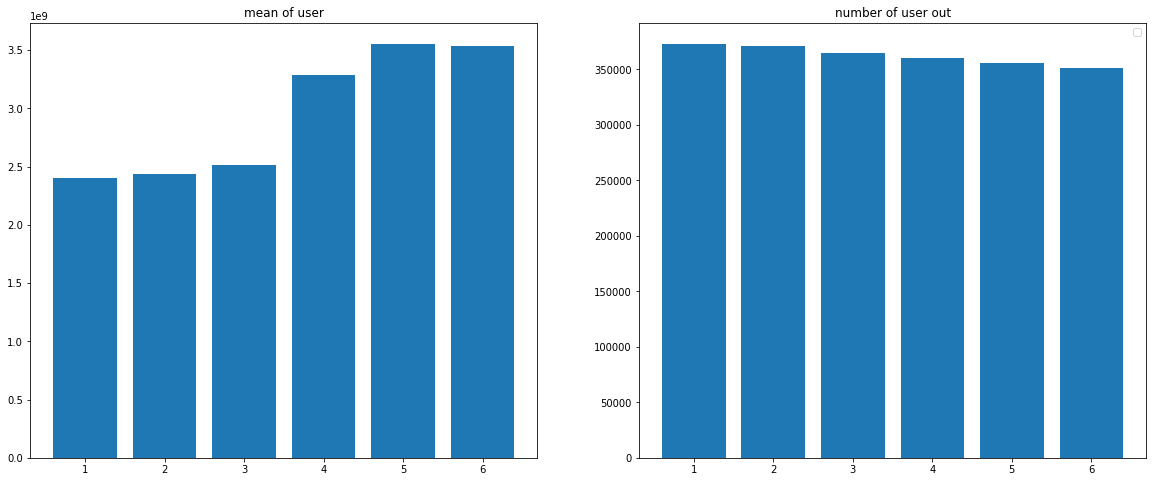

In [ ]:
#Tổng lượng hàng đã mua của dịch vụ M
Vol_M = data.iloc[:,132:138]
Rev_VolM = sorted(Vol_M, reverse=True)
counter_cus_mean_out(data, Rev_VolM)

No handles with labels found to put in legend.


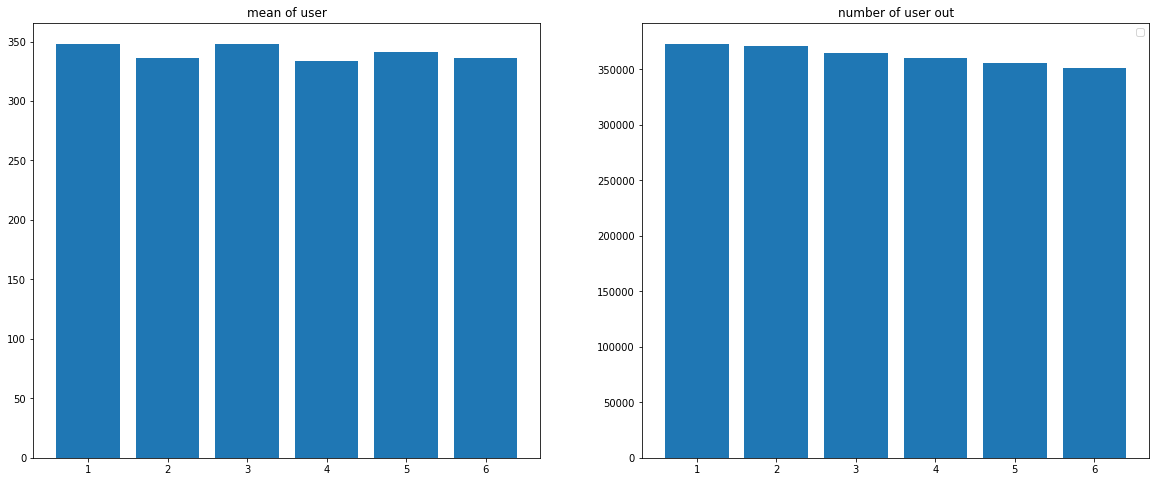

In [ ]:
#Tổng số lần sử dụng M
Time_M = data.iloc[:,138:144]
Rev_TimeM = sorted(Time_M, reverse=True)
counter_cus_mean_out(data, Rev_TimeM)

No handles with labels found to put in legend.


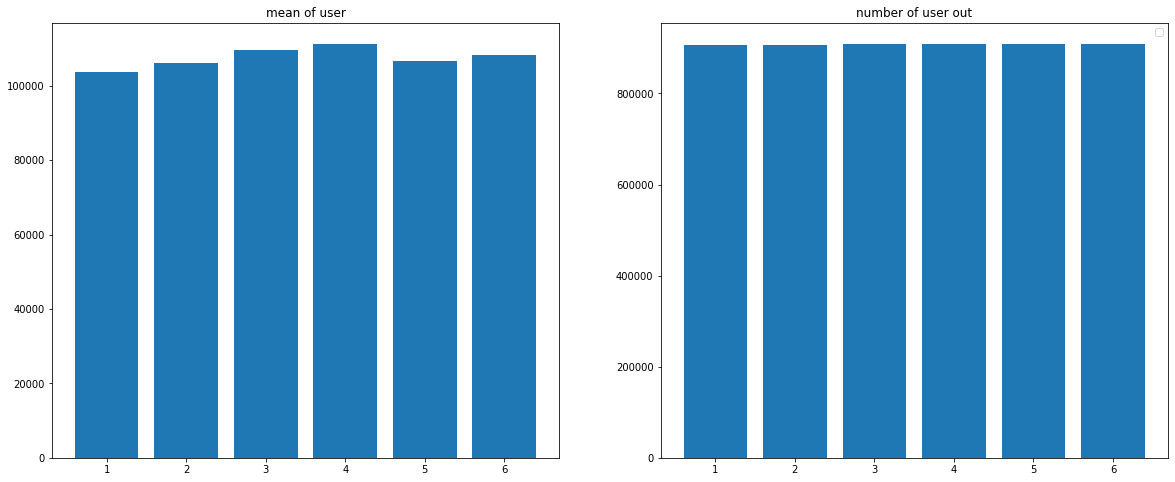

In [ ]:
#Tổng phí sử dụng M
Cha_M = data.iloc[:,144:150]
Rev_ChaM = sorted(Cha_M, reverse=True)
counter_cus_mean_out(data, Rev_ChaM)

###All Service 

No handles with labels found to put in legend.


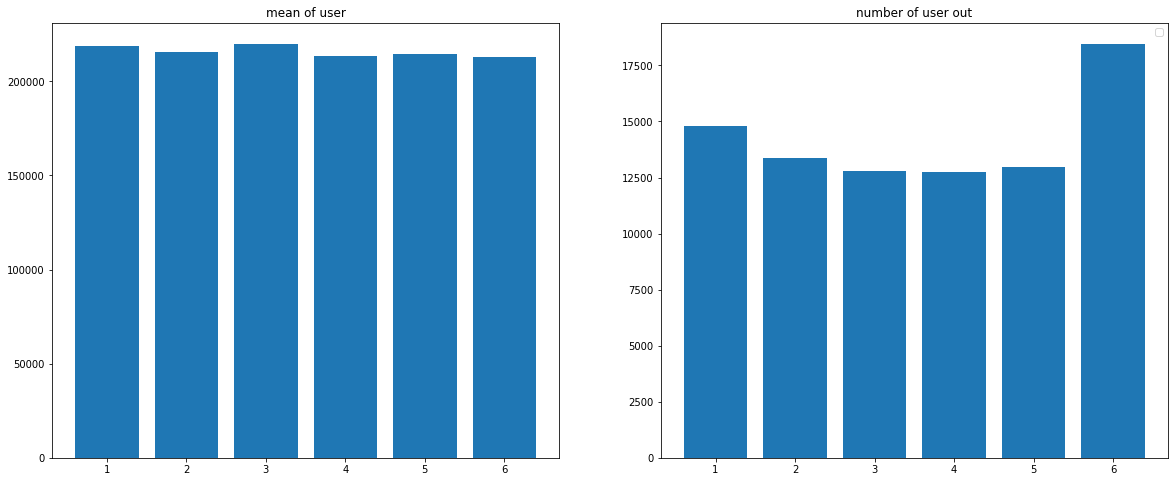

In [ ]:
#Tổng tiền sử dụng tất cả các dịch vụ
Cha_all = data.iloc[:,0:6]
Rev_all = sorted(Cha_all, reverse=True)
counter_cus_mean_out(data, Rev_all)

No handles with labels found to put in legend.


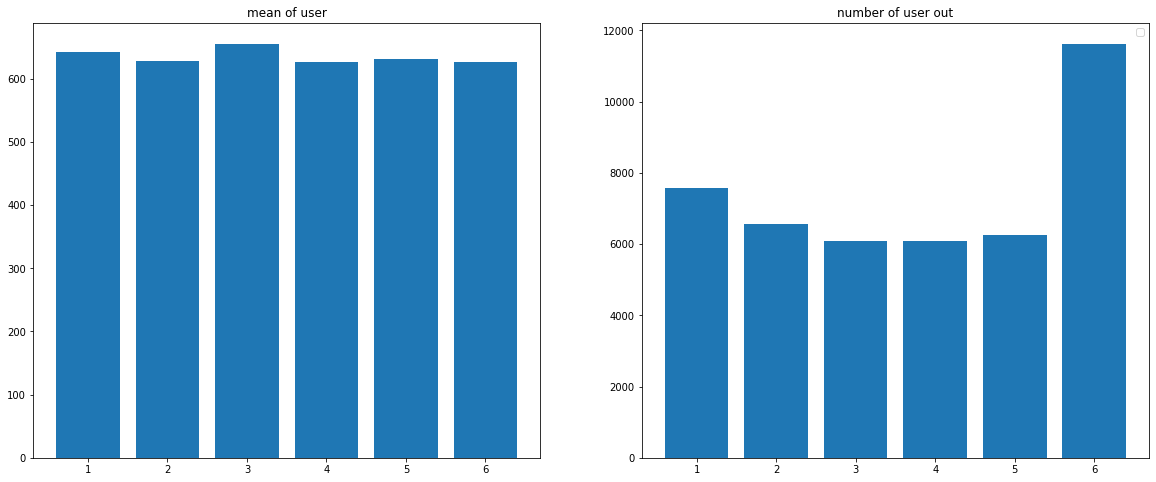

In [ ]:
#Tổng số lần sử dụng dịch vụ
Time_all = data.iloc[:,6:12]
Rev_Time_all = sorted(Time_all, reverse=True)
counter_cus_mean_out(data, Rev_Time_all)

No handles with labels found to put in legend.


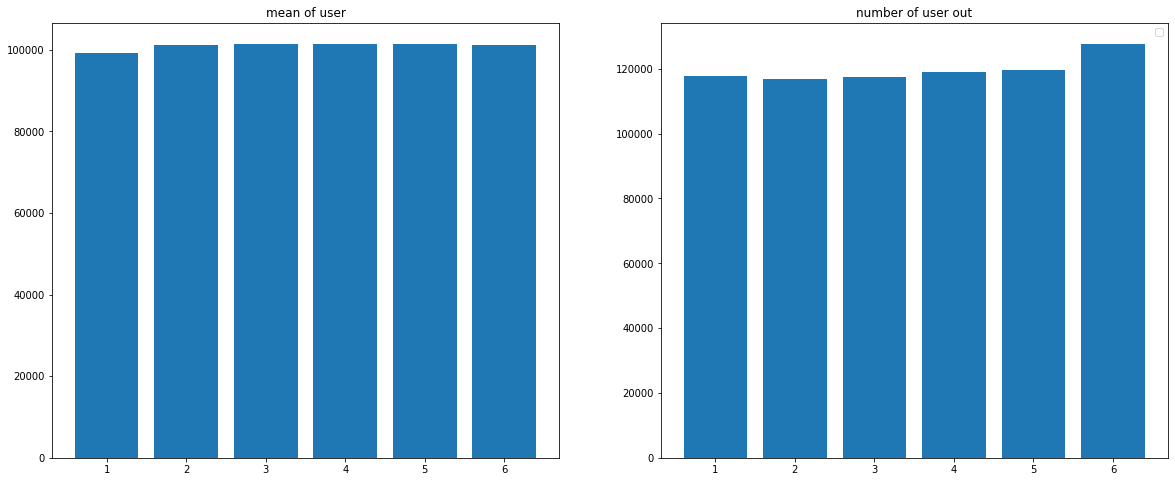

In [ ]:
#Phí tham gia  free_service
Free_all = data.iloc[:,12:18]
Rev_Free_all = sorted(Free_all, reverse=True)
counter_cus_mean_out(data, Rev_Free_all)

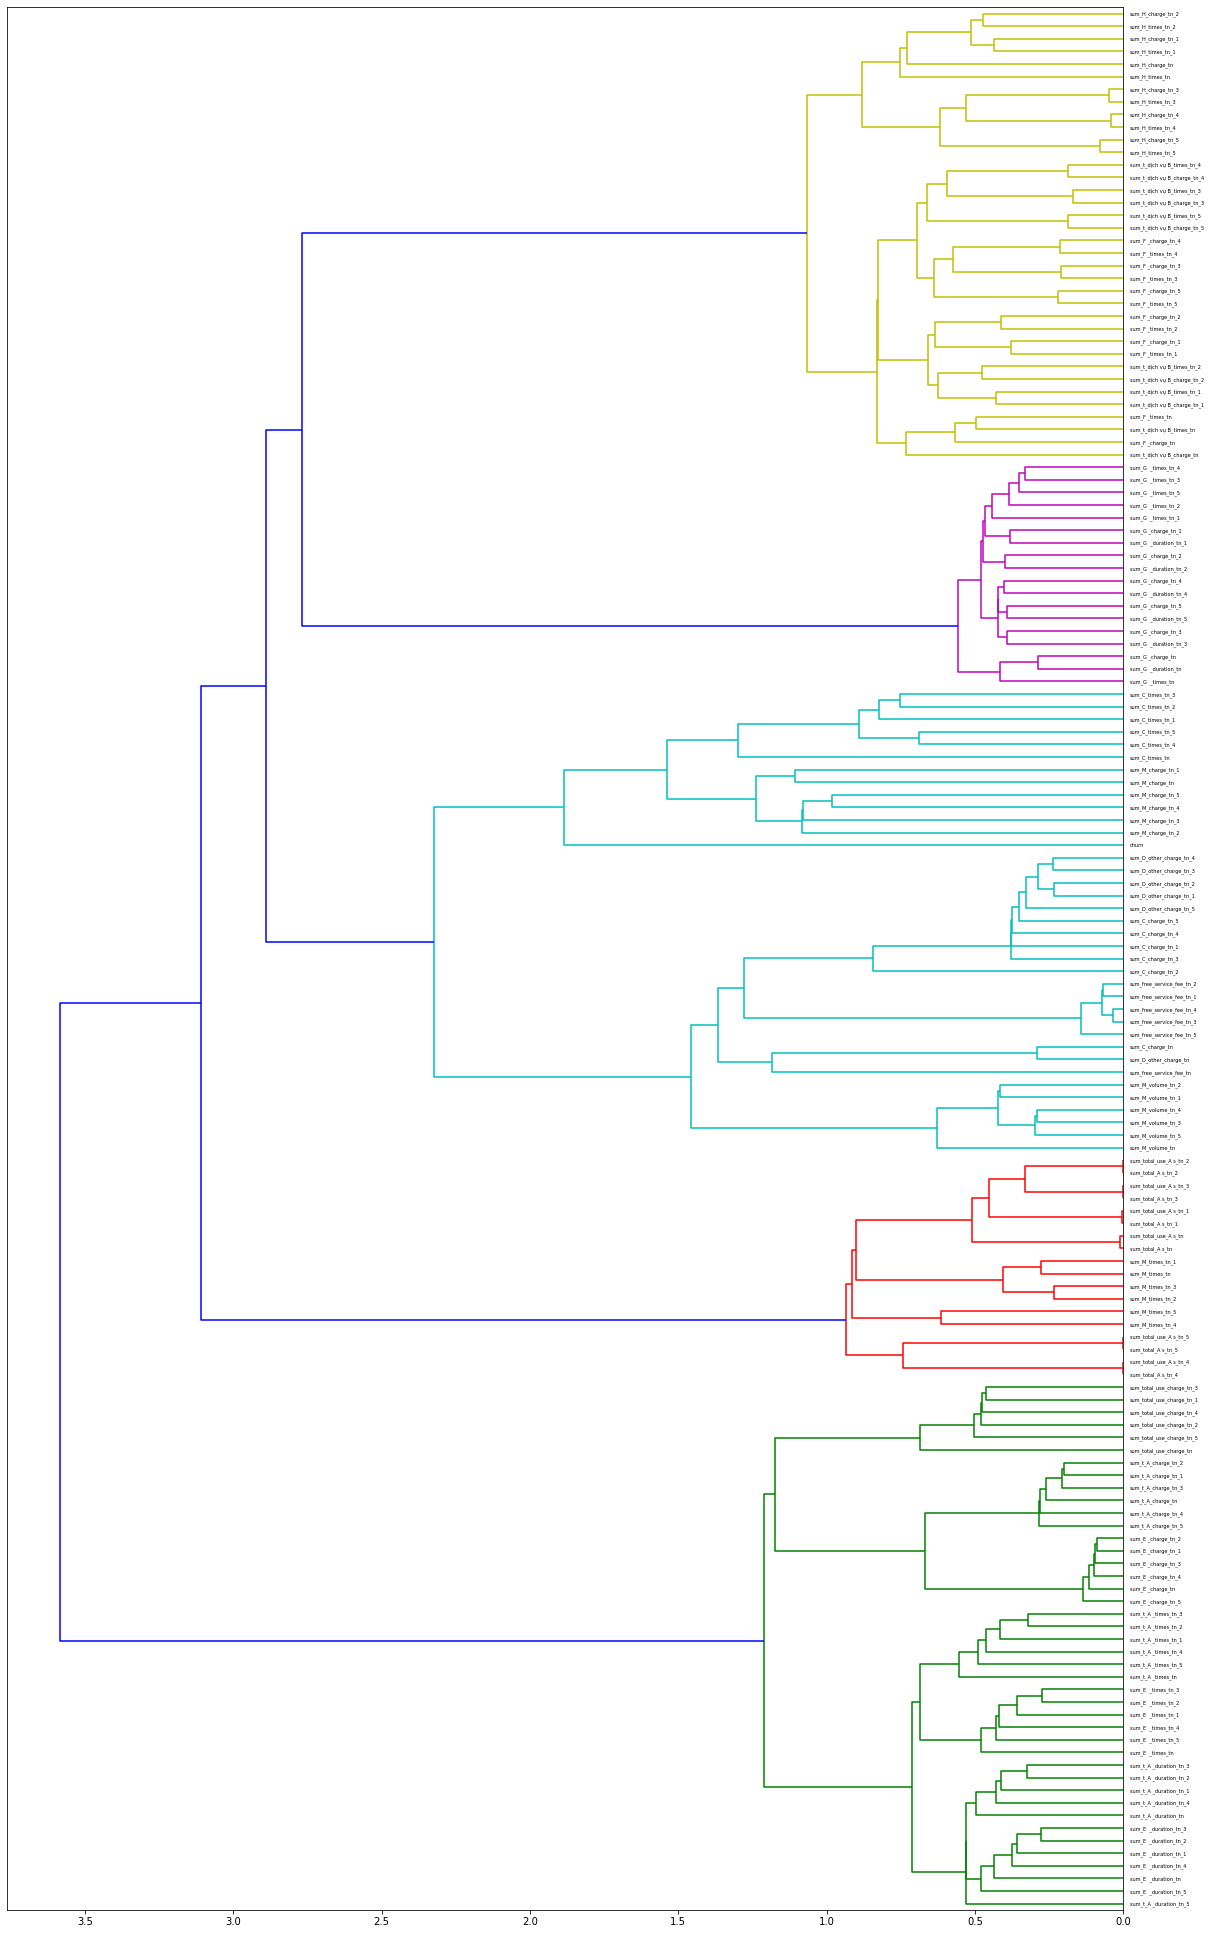

In [ ]:
plt.figure(figsize=(20,35))
dn = hierarchy.dendrogram(z, orientation='left', labels=data_balanced.columns.values)
plt.show()

## PreProcessing

###Find column zero


In [ ]:
zdata = (data == 0).sum(axis=0)
type(zdata)
zdata = zdata.tolist()

In [ ]:
zlist = []
for i in range(len(zdata)):
  ratio = zdata[i]/919361
  if ratio > 0.6:
    zlist.append(i)

In [ ]:
zlist

[96, 97, 98, 99, 100, 101, 144, 145, 146, 147, 148, 149, 150]

In [ ]:
(data.iloc[:,96:102] == 0).sum(axis = 0)

sum_E _charge_tn      747309
sum_E _charge_tn_1    746062
sum_E _charge_tn_2    749546
sum_E _charge_tn_3    742801
sum_E _charge_tn_4    746528
sum_E _charge_tn_5    739885
dtype: int64

In [ ]:
(data.iloc[:,144:150] == 0).sum(axis = 0)

sum_M_charge_tn      909508
sum_M_charge_tn_1    908863
sum_M_charge_tn_2    908365
sum_M_charge_tn_3    908037
sum_M_charge_tn_4    907501
sum_M_charge_tn_5    906648
dtype: int64

In [ ]:
# data = data.drop(data.columns[[98,99,100,101,102,103,146,147,148,149,150,151]], axis=1)

###Imbalance data

In [ ]:
label_count = data.churn.value_counts()
print('Class 0 : ', label_count[0])
print('Class 1 : ', label_count[1])

Class 0 :  895884
Class 1 :  23477


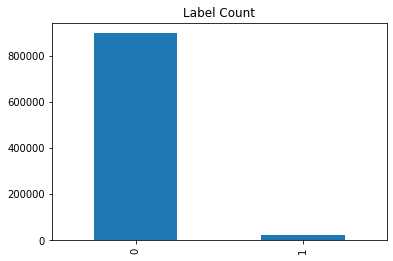

In [ ]:
label_count.plot(kind='bar',title='Label Count')

In [ ]:
# Class count
count_class = 300000
# count_class_0, count_class_1 = data.churn.value_counts()

# Divide by class
data_class_0 = data[data['churn'] == 0]
data_class_1 = data[data['churn'] == 1]

####Under-sampling

Under-sampling:
0    300000
1     23477
Name: churn, dtype: int64


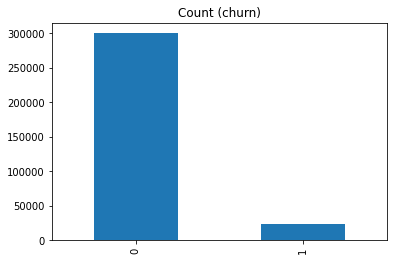

In [ ]:
data_class_0_under = data_class_0.sample(count_class)
data_test_under = pd.concat([data_class_0_under, data_class_1], axis=0)

print('Under-sampling:')
print(data_test_under.churn.value_counts())

data_test_under.churn.value_counts().plot(kind='bar', title='Count (churn)');

####Over-sampling

Over-sampling:
1    300000
0    300000
Name: churn, dtype: int64


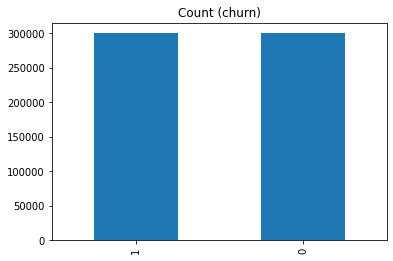

In [ ]:
data_class_1_over = data_class_1.sample(count_class, replace=True)
data_balanced = pd.concat([data_class_0_under, data_class_1_over], axis=0)

print('Over-sampling:')
print(data_balanced.churn.value_counts())

data_balanced.churn.value_counts().plot(kind='bar', title='Count (churn)');

###Dendrogarm


In [ ]:
from scipy.cluster import hierarchy
corr = data_balanced.corr() 
z = hierarchy.linkage(corr, 'single')

In [ ]:
churn_count = data.groupby('churn')
churn_count.mean()

,sum_total_use_charge_tn,sum_total_use_charge_tn_1,sum_total_use_charge_tn_2,sum_total_use_charge_tn_3,sum_total_use_charge_tn_4,sum_total_use_charge_tn_5,sum_total_A s_tn,sum_total_A s_tn_1,sum_total_A s_tn_2,sum_total_A s_tn_3,sum_total_A s_tn_4,sum_total_A s_tn_5,sum_free_service_fee_tn,sum_free_service_fee_tn_1,sum_free_service_fee_tn_2,sum_free_service_fee_tn_3,sum_free_service_fee_tn_4,sum_free_service_fee_tn_5,sum_t_A_charge_tn,sum_t_A_charge_tn_1,sum_t_A_charge_tn_2,sum_t_A_charge_tn_3,sum_t_A_charge_tn_4,sum_t_A_charge_tn_5,sum_t_dịch vụ B_charge_tn,sum_t_dịch vụ B_charge_tn_1,sum_t_dịch vụ B_charge_tn_2,sum_t_dịch vụ B_charge_tn_3,sum_t_dịch vụ B_charge_tn_4,sum_t_dịch vụ B_charge_tn_5,sum_t_dịch vụ B_times_tn,sum_t_dịch vụ B_times_tn_1,sum_t_dịch vụ B_times_tn_2,sum_t_dịch vụ B_times_tn_3,sum_t_dịch vụ B_times_tn_4,sum_t_dịch vụ B_times_tn_5,sum_t_A _times_tn,sum_t_A _times_tn_1,sum_t_A _times_tn_2,sum_t_A _times_tn_3,...,sum_G _duration_tn_2,sum_G _duration_tn_3,sum_G _duration_tn_4,sum_G _duration_tn_5,sum_G _charge_tn,sum_G _charge_tn_1,sum_G _charge_tn_2,sum_G _charge_tn_3,sum_G _charge_tn_4,sum_G _charge_tn_5,sum_H_times_tn,sum_H_times_tn_1,sum_H_times_tn_2,sum_H_times_tn_3,sum_H_times_tn_4,sum_H_times_tn_5,sum_H_charge_tn,sum_H_charge_tn_1,sum_H_charge_tn_2,sum_H_charge_tn_3,sum_H_charge_tn_4,sum_H_charge_tn_5,sum_M_volume_tn,sum_M_volume_tn_1,sum_M_volume_tn_2,sum_M_volume_tn_3,sum_M_volume_tn_4,sum_M_volume_tn_5,sum_M_times_tn,sum_M_times_tn_1,sum_M_times_tn_2,sum_M_times_tn_3,sum_M_times_tn_4,sum_M_times_tn_5,sum_M_charge_tn,sum_M_charge_tn_1,sum_M_charge_tn_2,sum_M_charge_tn_3,sum_M_charge_tn_4,sum_M_charge_tn_5
churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,211031.991188,212438.229440,211137.658553,217510.841865,212872.380066,215750.853006,628.874386,631.989969,626.357618,655.169042,627.752413,639.950237,87789.602527,88061.229453,88281.15258,88305.063813,88272.343201,86462.194145,59975.641871,60248.639730,59853.903398,64778.372034,61041.635293,62954.877241,16729.592005,17313.861366,17362.725480,17734.449882,16669.674906,16900.337849,61.435459,63.768977,64.01670,65.327709,61.035822,61.936807,321.305897,322.091209,324.187532,343.490971,...,3182.715460,3393.877436,3212.876079,3242.232256,44044.448409,44641.800070,44519.217316,47583.861168,44967.713806,45523.534731,15.457846,16.119282,16.273340,16.385033,15.106379,15.301592,4724.102722,4877.378792,4916.068239,4971.377996,4628.103981,4711.552518,2.220270e+09,2.193671e+09,2.003963e+09,1.519816e+09,1.453496e+09,1.429729e+09,211.675263,211.834227,205.005799,211.946088,202.393126,208.543177,1163.444431,1196.296898,1309.662832,1341.244492,1376.668667,1442.100018
1,110118.345562,182933.175455,193162.752885,195644.007520,189574.413836,193279.007850,241.823998,424.636325,476.191294,510.050219,493.888955,513.199216,58255.980722,91497.717149,92556.51886,92852.659035,93096.873637,92239.674990,22581.859350,39445.968017,44814.806384,47811.968999,44470.592835,45454.901483,6957.338156,13708.605576,15850.449652,15942.909327,15177.955829,14810.911997,24.727095,50.610768,58.52528,59.123142,55.913405,54.979640,130.617924,224.548920,257.301998,281.105933,...,2168.802062,2310.089577,2214.434084,2243.414491,13299.204317,25097.816084,29610.392623,31556.700037,30148.555959,30558.182419,5.098181,10.743749,12.505729,11.968522,11.425651,11.078332,1557.031455,3258.143142,3798.156010,3643.125085,3512.706116,3415.030805,8.739857e+08,1.654565e+09,1.753181e+09,1.408549e+09,1.369597e+09,1.345489e+09,68.511607,116.718746,127.533373,135.870810,128.907314,140.290880,1029.368871,2008.586466,2155.298557,1686.212143,997.911121,1049.011079


## Training data

In [ ]:
# X = data.drop(['churn'],axis=1)
# y = data.churn

X = data_balanced.drop(['churn'], axis=1)
y = data_balanced.churn

scaler = MinMaxScaler()
x = scaler.fit_transform(X)
y = scaler.fit_transform(np.array(y).reshape(-1, 1))

In [ ]:
X.shape,y.shape

((600000, 152), (600000, 1))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((480000, 152), (120000, 152))

## LogisticRegreesion

In [ ]:
from sklearn.linear_model import LogisticRegression
lo = LogisticRegression()
lo.fit(x_train, y_train)
y_pred = lo.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78     59987
         1.0       0.79      0.76      0.78     60013

    accuracy                           0.78    120000
   macro avg       0.78      0.78      0.78    120000
weighted avg       0.78      0.78      0.78    120000



## NN


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras import optimizers

model = Sequential()
model.add(Dense(150, activation='relu'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='mse', optimizer='adam', metrics = ['mse', 'mae'])

history = model.fit(x_train, y_train, epochs= 10, validation_split=0.3, batch_size=32)

Epoch 1/10
10500/10500 [==============================] - 26s 2ms/step - loss: 0.1552 - mse: 0.1552 - mae: 0.3094 - val_loss: 0.1479 - val_mse: 0.1479 - val_mae: 0.2979
Epoch 2/10
10500/10500 [==============================] - 25s 2ms/step - loss: 0.1483 - mse: 0.1483 - mae: 0.2949 - val_loss: 0.1464 - val_mse: 0.1464 - val_mae: 0.2988
Epoch 3/10
10500/10500 [==============================] - 26s 2ms/step - loss: 0.1465 - mse: 0.1465 - mae: 0.2918 - val_loss: 0.1449 - val_mse: 0.1449 - val_mae: 0.2837
Epoch 4/10
10500/10500 [==============================] - 28s 3ms/step - loss: 0.1454 - mse: 0.1454 - mae: 0.2898 - val_loss: 0.1445 - val_mse: 0.1445 - val_mae: 0.2919
Epoch 5/10
10500/10500 [==============================] - 27s 3ms/step - loss: 0.1442 - mse: 0.1442 - mae: 0.2880 - val_loss: 0.1436 - val_mse: 0.1436 - val_mae: 0.2878
Epoch 6/10
10500/10500 [==============================] - 27s 3ms/step - loss: 0.1433 - mse: 0.1433 - mae: 0.2860 - val_loss: 0.1425 - val_mse: 0.1425 - va

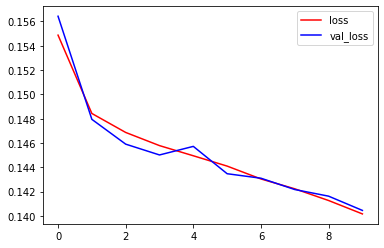

In [ ]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], 'r', label = 'loss')
plt.plot(history_df['val_loss'], 'b', label='val_loss')
plt.legend()

In [ ]:
model.evaluate(x_test, y_test)

3750/3750 [==============================] - 5s 1ms/step - loss: 0.1400 - mse: 0.1400 - mae: 0.2803


[0.1399717479944229, 0.1399717479944229, 0.28026822209358215]

##Note

In [ ]:
#su dung mo hinh roi danh gia dac trung, xem so lan dich khach hang su dung lan cuoi, so lan khach hang tu bo dich vu, phan tich tung dich vu
#Drop Id
#phan tich tung dich vu vd nhu dich vu A danh gia khach hang roi bo dich vu
#danh gia bang visulize
#understand dataset
#xay dung mo hinh khach hang roi bo dich vu (logi, nn, 
#danh gia tung dich vu xem 
#1: understand 2: mo hinh

In [ ]:
#Tinh dendro xong gom nhom bon no voi nhau
#xem dich vu nao anh huong den khách rời bỏ dịch vụ
#xem dịch vụ nào ngon giữ chân khách hàng
#Xây dựng mô hình dự đoán feature important
#Cho batch size 

#Dung Tensor choi het mo hinh
#Dung Logis
#Dung Cac nn Don gian
#Dung ANN (Tot nhat)
#Dung LStm (Tot nhat)
#1.down sampling rui dung nn
#dung k fold danh gia
#dua ve bai toan
#dung 5 thang trong qua khu du doan thang n
#thang n thanh y du doan, ham activation = linear